In [1]:
%load_ext rpy2.ipython

In [53]:
%%R
data <- read.table("takehome_report.csv", sep = ",", header = T)
data[1:3,]

  wage educ exper tenure nonwhite female married numdep smsa northcen south
1 3.10   11     2      0        0      1       0      2    1        0     0
2 3.24   12    22      2        0      1       1      3    1        0     0
3 3.00   11     2      0        0      0       0      2    0        0     0
  west construc ndurman trcommpu trade services profserv profocc clerocc
1    1        0       0        0     0        0        0       0       0
2    1        0       0        0     0        1        0       0       0
3    1        0       0        0     1        0        0       0       0
  servocc    lwage expersq tenursq
1       0 1.131402       4       0
2       1 1.175573     484       4
3       0 1.098612       4       0


In [69]:
%%R
educsq <- data$educ^2
fit <- lm(lwage~ educ+educsq+exper+expersq+tenure+tenursq+numdep+log(tenure+1)+
          as.factor(female)+as.factor(nonwhite)+as.factor(married)+
          as.factor(smsa)+as.factor(northcen)+as.factor(south)+as.factor(west)+
          as.factor(construc)+as.factor(ndurman)+as.factor(trcommpu)+as.factor(trade)+
          as.factor(services)+as.factor(profserv)+as.factor(profocc)+
          as.factor(clerocc)+as.factor(servocc),data)
summary(fit)


Call:
lm(formula = lwage ~ educ + educsq + exper + expersq + tenure + 
    tenursq + numdep + log(tenure + 1) + as.factor(female) + 
    as.factor(nonwhite) + as.factor(married) + as.factor(smsa) + 
    as.factor(northcen) + as.factor(south) + as.factor(west) + 
    as.factor(construc) + as.factor(ndurman) + as.factor(trcommpu) + 
    as.factor(trade) + as.factor(services) + as.factor(profserv) + 
    as.factor(profocc) + as.factor(clerocc) + as.factor(servocc), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6845 -0.2098 -0.0125  0.1976  1.2650 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.346e+00  1.859e-01   7.240 1.70e-12 ***
educ                 -3.859e-02  2.789e-02  -1.384  0.16710    
educsq                3.682e-03  1.167e-03   3.154  0.00171 ** 
exper                 2.688e-02  5.048e-03   5.326 1.52e-07 ***
expersq              -5.675e-04  1.078e-04  -5.262 2.11e-07 ***
tenure               

In [78]:
%%R
library("MASS")
stepAIC(fit)

Start:  AIC=-1047.84
lwage ~ educ + educsq + exper + expersq + tenure + tenursq + 
    numdep + log(tenure + 1) + (female) + (nonwhite) + (married) + 
    (smsa) + (northcen) + (south) + (west) + (construc) + (ndurman) + 
    (trcommpu) + (trade) + (services) + (profserv) + (profocc) + 
    (clerocc) + (servocc)

                  Df Sum of Sq    RSS     AIC
- tenursq          1    0.0010 65.247 -1049.8
- tenure           1    0.0157 65.261 -1049.7
- nonwhite         1    0.0168 65.263 -1049.7
- construc         1    0.0461 65.292 -1049.5
- clerocc          1    0.0827 65.328 -1049.2
- west             1    0.1070 65.353 -1049.0
- log(tenure + 1)  1    0.1711 65.417 -1048.5
- northcen         1    0.1945 65.440 -1048.3
- south            1    0.1976 65.443 -1048.2
- trcommpu         1    0.2461 65.492 -1047.9
<none>                         65.246 -1047.8
- educ             1    0.2493 65.495 -1047.8
- married          1    0.2521 65.498 -1047.8
- numdep           1    0.3319 65.578 -10

In [79]:
%%R
fit_AIC <- lm(formula = lwage ~ educ+educsq + exper + expersq + log(tenure + 
    1) + female + smsa + northcen + south + trade + services + 
    profocc + servocc, data = data)
summary(fit_AIC)


Call:
lm(formula = lwage ~ educ + educsq + exper + expersq + log(tenure + 
    1) + female + smsa + northcen + south + trade + services + 
    profocc + servocc, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64213 -0.20211 -0.01363  0.20799  1.28660 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.239e+00  1.745e-01   7.103 4.11e-12 ***
educ            -3.123e-02  2.743e-02  -1.139  0.25535    
educsq           3.461e-03  1.156e-03   2.994  0.00289 ** 
exper            2.792e-02  4.545e-03   6.142 1.64e-09 ***
expersq         -5.643e-04  9.721e-05  -5.805 1.13e-08 ***
log(tenure + 1)  8.970e-02  1.797e-02   4.992 8.19e-07 ***
female          -2.709e-01  3.297e-02  -8.215 1.75e-15 ***
smsa             1.508e-01  3.708e-02   4.067 5.51e-05 ***
northcen        -7.453e-02  4.054e-02  -1.838  0.06660 .  
south           -8.288e-02  3.781e-02  -2.192  0.02882 *  
trade           -2.233e-01  3.700e-02  -6.035 3.05e-09 *

In [77]:
%%R
educsq <- data$educ^2
fit <- lm(lwage~ educ+educsq+exper+expersq+tenure+tenursq+numdep+log(tenure+1)+
          (female)+(nonwhite)+(married)+
          (smsa)+(northcen)+(south)+(west)+
          (construc)+(ndurman)+(trcommpu)+(trade)+
          (services)+(profserv)+(profocc)+
          (clerocc)+(servocc),data)
summary(fit)


Call:
lm(formula = lwage ~ educ + educsq + exper + expersq + tenure + 
    tenursq + numdep + log(tenure + 1) + (female) + (nonwhite) + 
    (married) + (smsa) + (northcen) + (south) + (west) + (construc) + 
    (ndurman) + (trcommpu) + (trade) + (services) + (profserv) + 
    (profocc) + (clerocc) + (servocc), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6845 -0.2098 -0.0125  0.1976  1.2650 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.346e+00  1.859e-01   7.240 1.70e-12 ***
educ            -3.859e-02  2.789e-02  -1.384  0.16710    
educsq           3.682e-03  1.167e-03   3.154  0.00171 ** 
exper            2.688e-02  5.048e-03   5.326 1.52e-07 ***
expersq         -5.675e-04  1.078e-04  -5.262 2.11e-07 ***
tenure           5.449e-03  1.570e-02   0.347  0.72869    
tenursq         -3.217e-05  3.597e-04  -0.089  0.92878    
numdep          -2.245e-02  1.406e-02  -1.596  0.11103    
log(tenure + 1)  6.318e-02  5.511

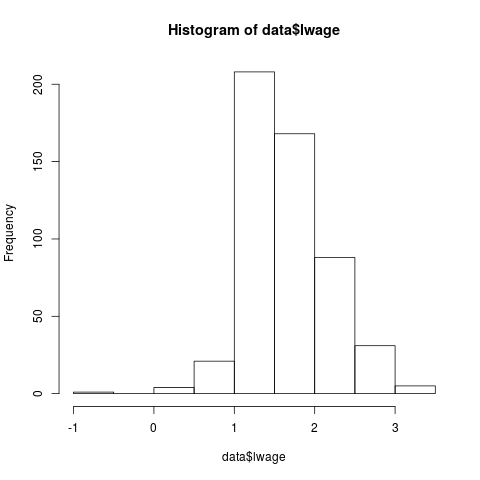

In [66]:
%%R
hist(data$lwage)

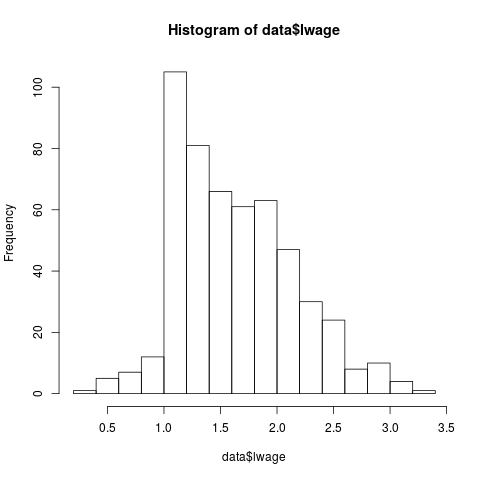

In [51]:
%%R
data <-data[-24,]
hist(data$lwage)